In [71]:
# Importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [72]:

# Correct path to the CSV file
Sales_data = pd.read_csv("C:/Users/joe/OneDrive/Desktop/Data_for_practice/sales_data.csv")

# Display the first few rows of the dataframe
Sales_data.head()


,Date,Store,Product,Quantity Sold,Price per Unit,Total Sales,Region,Discount,Customer Type
0,3/1/2025,Store 1,Product A,10,20,200,North,5%,Regular
1,3/1/2025,Store 1,Product B,15,15,225,North,10%,Regular
2,3/1/2025,Store 2,Product A,20,20,400,South,5%,New
3,3/1/2025,Store 2,Product C,30,25,750,South,0%,New
4,3/2/2025,Store 3,Product B,25,15,375,East,0%,Regular


In [73]:
## checing the data information and the shape of the data 
Sales_data.info()
Sales_data.shape 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            16 non-null     object
 1   Store           16 non-null     object
 2   Product         16 non-null     object
 3   Quantity Sold   16 non-null     int64 
 4   Price per Unit  16 non-null     int64 
 5   Total Sales     16 non-null     int64 
 6   Region          16 non-null     object
 7   Discount        16 non-null     object
 8   Customer Type   16 non-null     object
dtypes: int64(3), object(6)
memory usage: 1.2+ KB


(16, 9)

In [74]:
## Checking for the null values 
Sales_data.isnull().sum()

Date              0
Store             0
Product           0
Quantity Sold     0
Price per Unit    0
Total Sales       0
Region            0
Discount          0
Customer Type     0
dtype: int64

In [75]:
## calculatr the collinearity of the data 
numeric_data = Sales_data.select_dtypes(include=['float64', 'int64'])
##calculating the correlation matrix for the numeric columns only
correlation_matrix = numeric_data.corr()
# Display the correlation matrix
print(correlation_matrix)

                Quantity Sold  Price per Unit  Total Sales
Quantity Sold        1.000000        0.061542     0.913152
Price per Unit       0.061542        1.000000     0.437843
Total Sales          0.913152        0.437843     1.000000


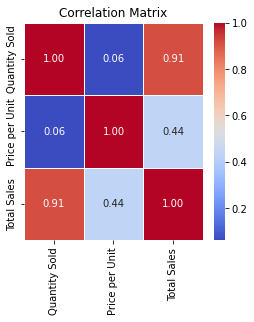

In [76]:
##Visualisation of the correlation Matrix 

plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

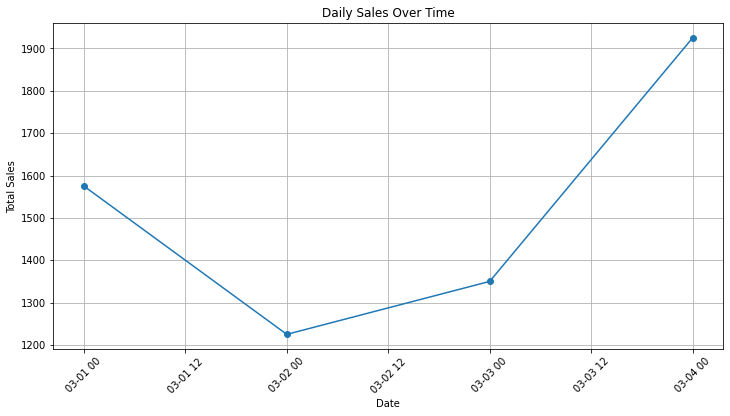

In [77]:

# Convert 'Date' column to datetime format if it's not already
Sales_data['Date'] = pd.to_datetime(Sales_data['Date'])

# Group by date and sum the sales
daily_sales = Sales_data.groupby('Date')['Total Sales'].sum()

# Plot time-series line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()


C:\Users\joe\AppData\Local\Temp/ipykernel_36160/3656440237.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Total Sales', data=region_sales, palette='Set2')


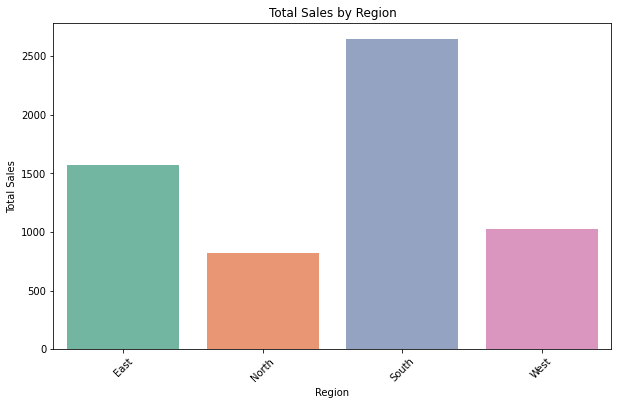

In [78]:
# Aggregate sales per region
region_sales = Sales_data.groupby('Region')['Total Sales'].sum().reset_index()

# Bar chart without hue (if no specific color coding is needed)
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Total Sales', data=region_sales, palette='Set2')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


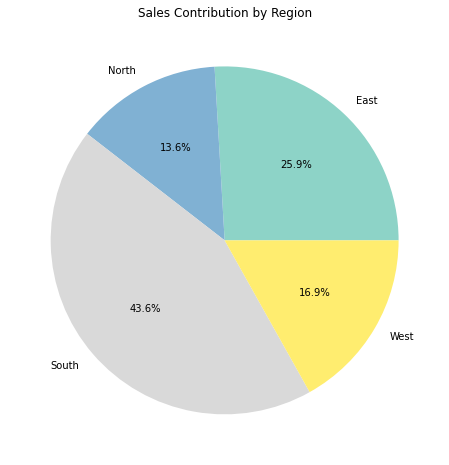

In [79]:
# Pie chart for sales distribution per region
plt.figure(figsize=(8, 8))
region_sales.set_index('Region')['Total Sales'].plot.pie(autopct='%1.1f%%', cmap='Set3')
plt.title('Sales Contribution by Region')
plt.ylabel('')  # Hide y-label
plt.show()

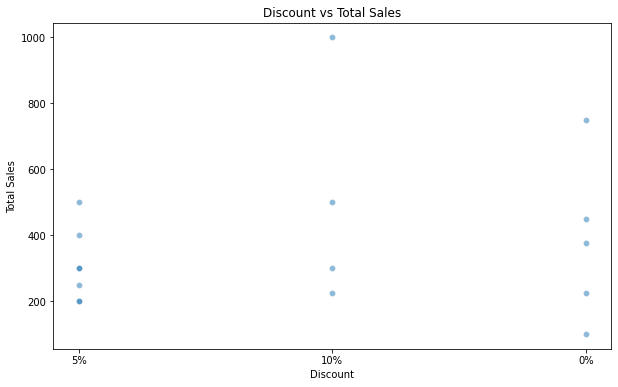

In [80]:
##Relationship Between Discount & Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Sales_data['Discount'], y=Sales_data['Total Sales'], alpha=0.5)
plt.title('Discount vs Total Sales')
plt.xlabel('Discount')
plt.ylabel('Total Sales')
plt.show()

In [81]:
##Feature Engineering
Sales_data = pd.get_dummies(Sales_data , columns=['Store', 'Product', 'Region', 'Customer Type'], drop_first=True)


In [82]:
# Convert 'Discount' column to numerical (removing '%')
Sales_data['Discount'] = Sales_data['Discount'].str.rstrip('%').astype(float) / 100

In [83]:
##Define Features (X) and Target (y)
X = Sales_data.drop(columns=['Total Sales', 'Date'])  # Features
y = Sales_data ['Total Sales']  # Target Variable


In [84]:
 ##Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    

In [85]:

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Model Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 97.60751667088691
MSE: 10781.229539638027
R2 Score: 0.9045314852249279


In [86]:
##Alternative: Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest R2 Score: 0.6796795572466274


In [87]:

# Convert 'Discount' column to numerical (removing '%' and dividing by 100)
Sales_data['Discount'] = Sales_data['Discount'].astype(str).str.rstrip('%').astype(float) / 100

In [88]:
print(Sales_data.columns )

Index(['Date', 'Quantity Sold', 'Price per Unit', 'Total Sales', 'Discount',
       'Store_Store 2', 'Store_Store 3', 'Store_Store 4', 'Product_Product B',
       'Product_Product C', 'Region_North', 'Region_South', 'Region_West',
       'Customer Type_Regular'],
      dtype='object')


In [89]:
# Define feature columns (excluding 'Total Sales')
X = Sales_data.drop(columns=['Total Sales', 'Date'])  # Dropping 'Date' since it's not needed
y = Sales_data['Total Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure X_train and y_train are numerical
X_train = X_train.astype(float)
y_train = y_train.astype(float)

# Define the model with a different solver if needed
model = Ridge(solver='svd')

# Define the parameter grid (alpha is the regularization strength)
param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Hyperparameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Best Hyperparameters:  {'alpha': 1}
Mean Squared Error: 3083.558435927682
R2 Score: 0.9726948820616573


In [90]:
## model performed well with an R² score of 0.9727, 
## which suggests that about 97.3% of the variance in the total sales can be explained by the model.


In [91]:
#check the coefficients of the model to interpret how each feature impacts the total sales.

# Get the feature names after one-hot encoding
feature_names = X.columns

# Create a DataFrame to display feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_model.coef_
})

# Print the DataFrame
print(coefficients_df)


                  Feature  Coefficient
0           Quantity Sold    19.697485
1          Price per Unit    21.348252
2                Discount    -0.026201
3           Store_Store 2    12.097820
4           Store_Store 3    -8.987032
5           Store_Store 4     9.207697
6       Product_Product B     2.455084
7       Product_Product C     6.724734
8            Region_North   -12.318485
9            Region_South    12.097820
10            Region_West     9.207697
11  Customer Type_Regular     4.205219


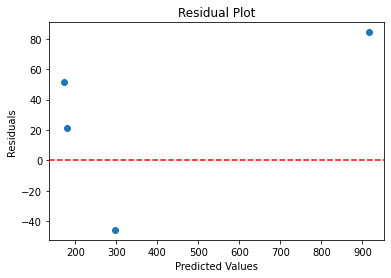

In [92]:
##The differences between predicted and actual values
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
